In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elenagomezb","key":"e6b48cd32b6a81ea30ea807852551799"}'}

# Datos

In [32]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Test**

In [33]:
! kaggle datasets download -d elenagomezb/datos-test

datos-test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!mkdir "/content/test"

mkdir: cannot create directory ‘/content/test’: File exists


In [35]:
!unzip -qq datos-test.zip -d "/content/test"

replace /content/test/59999_33123609.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


**Validación**

In [36]:
! kaggle datasets download -d elenagomezb/datos-validation

datos-validation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!mkdir "/content/val"

mkdir: cannot create directory ‘/content/val’: File exists


In [38]:
!unzip -qq datos-validation.zip -d "/content/val"

replace /content/val/51091_476922095.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


**Entrenamiento**

In [39]:
! kaggle datasets download -d elenagomezb/datos-train

datos-train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
!mkdir "/content/train"

mkdir: cannot create directory ‘/content/train’: File exists


In [41]:
!unzip -qq datos-train.zip -d "/content/train"

replace /content/train/10006_1459541791.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [2]:
import os

In [3]:
# Ruta del directorio
ruta_directorio = "/content/train"
ruta_directorio2 = "/content/val"
ruta_directorio3 = "/content/test"

# Obtener lista de elementos en el directorio
elementos = os.listdir(ruta_directorio)
elementos2 = os.listdir(ruta_directorio2)
elementos3 = os.listdir(ruta_directorio3)

# Contar número de elementos
num_elementos = len(elementos)
num_elementos2 = len(elementos2)
num_elementos3 = len(elementos3)

print(f"Hay {num_elementos} elementos en el directorio {ruta_directorio}")
print(f"Hay {num_elementos2} elementos en el directorio {ruta_directorio2}")
print(f"Hay {num_elementos3} elementos en el directorio {ruta_directorio3}")

Hay 38294 elementos en el directorio /content/train
Hay 8207 elementos en el directorio /content/val
Hay 8205 elementos en el directorio /content/test


**Datos csv**

In [4]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

csv_path = '/content/Datos_Breast_Cancer.csv'
df = pd.read_csv(csv_path)
df.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232.png
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True,10011_270344397.png
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False,10011_541722628.png
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False,10011_1031443799.png
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False,10025_562340703.png
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False,10025_1365269360.png


(512, 512)


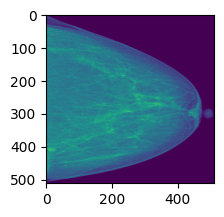

(512, 512)


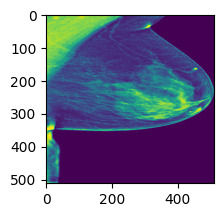

(512, 512)


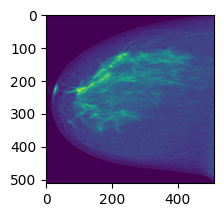

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta del directorio donde se encuentran las imágenes
path = '/content/train'

# Obtener la lista de archivos en el directorio
files = os.listdir(path)
files_prueba = files[:3]

# Mostrar cada imagen en una figura de matplotlib
for file in files_prueba:
    img_path = os.path.join(path, file)
    img = Image.open(img_path)
    plt.subplot(2,2,2)
    print(img.size)
    plt.imshow(img)
    plt.show()

# Datasets

In [6]:
df['cancer'] = df['cancer'].astype(str)

Entrenamiento

In [7]:
import pandas as pd

# Seleccionar los registros cuya columna 'image_zip' coincida con los nombres de archivos en 'files'
df_train = df[df['image_zip'].isin(files)]
df_train


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38294,1,51091,396011329,R,CC,66.0,0,0,0,1.0,0,C,93,False,51091_396011329.png
38295,1,51091,1357908885,R,MLO,66.0,0,0,0,1.0,0,C,93,False,51091_1357908885.png
38296,1,51091,1825223741,R,MLO,66.0,0,0,0,1.0,0,C,93,False,51091_1825223741.png
38422,2,51276,711908647,L,MLO,54.0,1,1,0,NaN,0,NaN,21,False,51276_711908647.png


Validacion

In [8]:
# Ruta del directorio donde se encuentran las imágenes
path = '/content/val'

# Obtener la lista de archivos en el directorio
files_val = os.listdir(path)

In [9]:
# Seleccionar los registros cuya columna 'image_zip' coincida con los nombres de archivos en 'files'
df_val= df[df['image_zip'].isin(files_val)]
df_val

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
38292,1,51091,476922095,L,MLO,66.0,0,0,0,1.0,0,C,93,False,51091_476922095.png
38297,2,5110,713671002,L,MLO,50.0,0,0,0,NaN,0,NaN,21,False,5110_713671002.png
38298,2,5110,2033903486,L,CC,50.0,0,0,0,NaN,0,NaN,21,False,5110_2033903486.png
38299,2,5110,168639181,R,CC,50.0,0,0,0,NaN,0,NaN,21,False,5110_168639181.png
38300,2,5110,1682117507,R,MLO,50.0,0,0,0,NaN,0,NaN,21,False,5110_1682117507.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47084,2,60617,1075848024,L,MLO,68.0,1,1,0,NaN,0,NaN,21,False,60617_1075848024.png
47085,2,60617,2047450417,L,CC,68.0,1,1,0,NaN,0,NaN,21,False,60617_2047450417.png
47092,1,60629,306442803,L,MLO,59.0,1,1,0,0.0,0,B,49,False,60629_306442803.png
47093,1,60629,697950433,L,CC,59.0,1,1,0,0.0,0,B,49,False,60629_697950433.png


Test

In [10]:
# Ruta del directorio donde se encuentran las imágenes
path = '/content/test'

# Obtener la lista de archivos en el directorio
files_test = os.listdir(path)

In [11]:
df_test= df[df['image_zip'].isin(files_test)]
df_test

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
37282,2,5,640805896,L,MLO,68.0,0,0,0,0.0,0,NaN,21,True,5_640805896.png
37283,2,5,1351088028,L,CC,68.0,0,0,0,0.0,0,NaN,21,True,5_1351088028.png
37284,2,5,940388076,R,CC,68.0,0,0,0,NaN,0,NaN,21,False,5_940388076.png
37285,2,5,1633417959,R,MLO,68.0,0,0,0,NaN,0,NaN,21,False,5_1633417959.png
46475,1,5999,422542358,L,MLO,39.0,0,0,0,1.0,0,C,216,False,5999_422542358.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,9973_1729524723.png
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,9989_63473691.png
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,9989_1078943060.png
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,9989_398038886.png


# Compensar clases

Entrenamiento

In [12]:
df_train_1 = df_train.loc[df['cancer']=='1']
df_train_0 = df_train.loc[df['cancer']=='0']
print(len(df_train_1))
print(len(df_train_0))

811
37483


In [13]:
df_train_0 = df_train_0.sample(frac=1).reset_index(drop=True)
df_train_0 = df_train_0[:len(df_train_1)]

In [14]:
df_entrenamiento = pd.concat([df_train_1, df_train_0])
df_entrenamiento = df_entrenamiento.sample(frac=1).reset_index(drop=True)
df_entrenamiento

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,1,34962,1690489424,L,CC,61.0,1,1,0,0.0,0,B,49,False,34962_1690489424.png
1,1,44709,1700493110,L,MLO,72.0,1,1,1,0.0,0,B,49,False,44709_1700493110.png
2,1,3670,87674192,R,CC,66.0,1,1,1,0.0,0,C,49,False,3670_87674192.png
3,2,31468,777256351,R,CC,62.0,0,0,0,NaN,0,NaN,48,False,31468_777256351.png
4,2,35549,260560925,R,CC,47.0,0,0,0,NaN,0,NaN,21,False,35549_260560925.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,1,36034,80000307,L,MLO,67.0,1,1,1,0.0,0,B,49,False,36034_80000307.png
1618,1,4953,94584715,R,CC,65.0,1,1,0,0.0,0,B,49,False,4953_94584715.png
1619,1,36109,623935507,R,MLO,74.0,0,0,0,1.0,0,B,216,False,36109_623935507.png
1620,2,25225,1192218747,L,MLO,58.0,0,0,0,NaN,0,NaN,48,False,25225_1192218747.png


Validacion

In [15]:
df_val_0 = df_val.loc[df_val['cancer']=='0']
df_val_1 = df_val.loc[df_val['cancer']=='1']

In [16]:
df_val_0 = df_val_0.sample(frac=1).reset_index(drop=True)
df_val_0 = df_val_0[:len(df_val_1)]

In [24]:
df_validacion= pd.concat([df_val_1, df_val_0])
df_validacion = df_validacion.sample(frac=1).reset_index(drop=True)
df_validacion

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,53272,362089845,L,MLO,73.0,1,1,1,NaN,0,NaN,48,False,53272_362089845.png
1,1,56433,586607970,L,CC,46.0,0,0,0,NaN,1,D,49,False,56433_586607970.png
2,1,59442,71611278,R,MLO,44.0,0,0,0,0.0,0,B,210,True,59442_71611278.png
3,2,57874,1720177493,R,MLO,69.0,0,0,0,NaN,0,NaN,29,False,57874_1720177493.png
4,2,59623,1462116952,L,CC,44.0,0,0,0,NaN,0,NaN,29,False,59623_1462116952.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,52744,885195786,L,MLO,42.0,0,0,0,1.0,0,B,49,False,52744_885195786.png
344,2,55095,864613243,R,CC,75.0,1,1,1,NaN,0,NaN,21,False,55095_864613243.png
345,2,51794,1440069767,L,MLO,52.0,0,0,0,NaN,0,NaN,48,False,51794_1440069767.png
346,1,53470,1563682938,L,CC,43.0,0,0,0,1.0,0,D,49,False,53470_1563682938.png


Test

In [17]:
df_test_0 = df_test.loc[df_test['cancer']=='0']
df_test_1 = df_test.loc[df_test['cancer']=='1']

In [18]:
df_test_0 = df_test_0.sample(frac=1).reset_index(drop=True)
df_test_0 = df_test_0[:len(df_test_1)]

In [19]:
df_test = pd.concat([df_test_1, df_test_0])
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,61172,493712577,R,CC,73.0,0,0,0,NaN,0,NaN,29,False,61172_493712577.png
1,1,64300,391042182,R,CC,65.0,0,1,0,0.0,0,B,49,True,64300_391042182.png
2,1,9559,1047452753,L,MLO,76.0,1,1,1,0.0,0,B,49,False,9559_1047452753.png
3,2,65427,808462263,L,CC,60.0,1,1,1,NaN,0,NaN,48,False,65427_808462263.png
4,2,64821,680464985,R,MLO,65.0,1,1,1,NaN,0,NaN,48,False,64821_680464985.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,1,9559,203061242,L,CC,76.0,1,1,1,0.0,0,B,49,False,9559_203061242.png
342,2,61287,724896749,L,MLO,60.0,0,0,0,NaN,0,NaN,29,False,61287_724896749.png
343,1,729,748167281,R,MLO,63.0,1,1,1,0.0,0,C,49,False,729_748167281.png
344,2,6134,1914548096,R,CC,61.0,0,0,0,NaN,0,NaN,21,False,6134_1914548096.png


# GENERADORES

In [25]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador = datagen.flow_from_dataframe(
    dataframe=df_entrenamiento,                           # dataframe con las etiquetas
    directory="/content/train",             # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 32,                        # tamaño del lote (batch)
    smart_resize = True
)



Found 1622 validated image filenames belonging to 2 classes.


In [26]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")



Clase '1': 811 imágenes
Clase '0': 811 imágenes


(180, 180, 3)


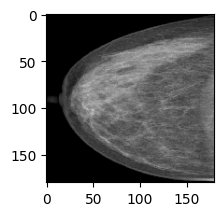

In [27]:
import matplotlib.pyplot as plt
# Obtener un lote de imágenes del generador
x_batch, y_batch = generador.next()
# Acceder a la primera imagen del lote
image = x_batch[0]
# Visualizar la imagen
plt.subplot(2,2,2)
plt.imshow(image)
print(image.shape)
plt.show()


In [28]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador_val = datagen.flow_from_dataframe(
    dataframe=df_validacion,                           # dataframe con las etiquetas
    directory="/content/val",               # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 32,                        # tamaño del lote (batch)
    smart_resize = True
)

Found 348 validated image filenames belonging to 2 classes.


In [29]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador_val.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")


Clase '1': 174 imágenes
Clase '0': 174 imágenes


In [30]:
# crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# crear generador de imágenes y etiquetas
generador_test = datagen.flow_from_dataframe(
    dataframe=df_test,                           # dataframe con las etiquetas
    directory="/content/test",             # carpeta con las imágenes
    x_col="image_zip",                      # columna del dataframe con los nombres de las imágenes
    y_col="cancer",                         # columna del dataframe con las etiquetas
    target_size=(180, 180),                 # tamaño de las imágenes
    class_mode="binary",                    # tipo de etiquetas
    batch_size= 32,                        # tamaño del lote (batch)
    smart_resize = True
)


Found 346 validated image filenames belonging to 2 classes.


In [31]:
from collections import Counter

# Obtener las etiquetas de las imágenes
labels = generador_test.classes

# Contar la cantidad de imágenes por clase
num_images_per_class = Counter(labels)

# Imprimir la cantidad de imágenes por clase
for class_name, count in num_images_per_class.items():
    print(f"Clase '{class_name}': {count} imágenes")


Clase '0': 173 imágenes
Clase '1': 173 imágenes


# MODELO BÁSICO CAPAS DENSAS

In [32]:
from tensorflow import keras
from tensorflow.keras import layers


Separando imagenes de etiquetas

In [33]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Obtener imágenes y etiquetas del generador de prueba
imagenes_train = []
etiquetas_train = []

for i in range(len(generador)):
    batch_imagenes, batch_etiquetas = generador[i]
    imagenes_train.extend(batch_imagenes)
    etiquetas_train.extend(batch_etiquetas)

# Convertir a numpy arrays
imagenes_train = np.array(imagenes_train)
etiquetas_train = np.array(etiquetas_train)

# Verificar las formas de los arrays resultantes
print("Forma de imágenes de prueba:", imagenes_train.shape)
print("Forma de etiquetas de prueba:", etiquetas_train.shape)



Forma de imágenes de prueba: (1622, 180, 180, 3)
Forma de etiquetas de prueba: (1622,)


In [35]:
# Obtener imágenes y etiquetas del generador de prueba
imagenes_val= []
etiquetas_val = []

for i in range(len(generador_val)):
    batch_imagenes, batch_etiquetas = generador_val[i]
    imagenes_val.extend(batch_imagenes)
    etiquetas_val.extend(batch_etiquetas)

# Convertir a numpy arrays
imagenes_val = np.array(imagenes_val)
etiquetas_val = np.array(etiquetas_val)

# Verificar las formas de los arrays resultantes
print(len(imagenes_val))
print(len(etiquetas_val))

348
348


In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(180, 180, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
history= model.fit(imagenes_train, etiquetas_train, epochs=20, validation_data= (imagenes_val, etiquetas_val))

Epoch 1/20
51/51 [==============================] - 6s 19ms/step - loss: 5.8022 - accuracy: 0.5025 - val_loss: 2.2904 - val_accuracy: 0.5000
Epoch 2/20
51/51 [==============================] - 1s 12ms/step - loss: 2.0219 - accuracy: 0.5043 - val_loss: 1.3455 - val_accuracy: 0.5086
Epoch 3/20
51/51 [==============================] - 1s 12ms/step - loss: 1.6665 - accuracy: 0.5117 - val_loss: 0.7679 - val_accuracy: 0.5287
Epoch 4/20
51/51 [==============================] - 1s 12ms/step - loss: 1.4308 - accuracy: 0.5271 - val_loss: 0.9358 - val_accuracy: 0.5000
Epoch 5/20
51/51 [==============================] - 1s 11ms/step - loss: 1.1591 - accuracy: 0.5487 - val_loss: 0.8473 - val_accuracy: 0.4971
Epoch 6/20
51/51 [==============================] - 1s 12ms/step - loss: 1.1160 - accuracy: 0.5277 - val_loss: 0.9640 - val_accuracy: 0.5057
Epoch 7/20
51/51 [==============================] - 1s 12ms/step - loss: 0.9724 - accuracy: 0.5364 - val_loss: 0.7090 - val_accuracy: 0.5402
Epoch 8/20
51

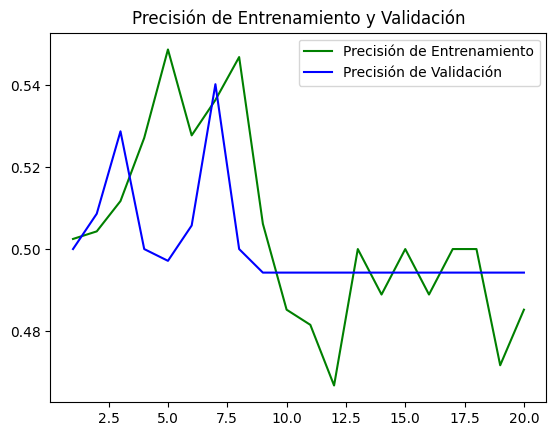

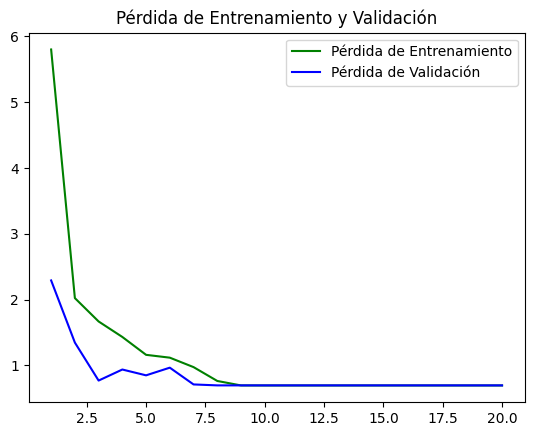

In [39]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

In [41]:
# Obtener imágenes y etiquetas del generador de prueba
imagenes_test= []
etiquetas_test = []

for i in range(len(generador_test)):
    batch_imagenes, batch_etiquetas = generador_test[i]
    imagenes_test.extend(batch_imagenes)
    etiquetas_test.extend(batch_etiquetas)

# Convertir a numpy arrays
imagenes_test = np.array(imagenes_test)
etiquetas_test = np.array(etiquetas_test)

# Verificar las formas de los arrays resultantes
print(len(imagenes_test))
print(len(etiquetas_test))

346
346


In [43]:
len(etiquetas_test)

346

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(imagenes_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = etiquetas_test

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-42-d829bc8a1c09>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(imagenes_test)


[[173   0]
 [173   0]]


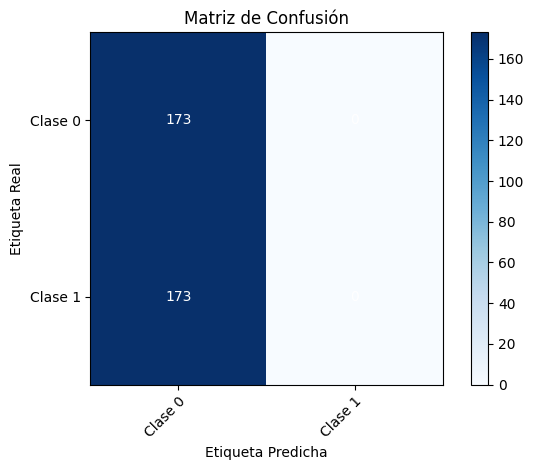

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Graficar la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Matriz de Confusión',
       ylabel='Etiqueta Real',
       xlabel='Etiqueta Predicha')

# Rotar las etiquetas del eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Anotar los valores en la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", color="white")

# Ajustar el diseño de la figura
fig.tight_layout()

# Mostrar la figura
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


In [46]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)


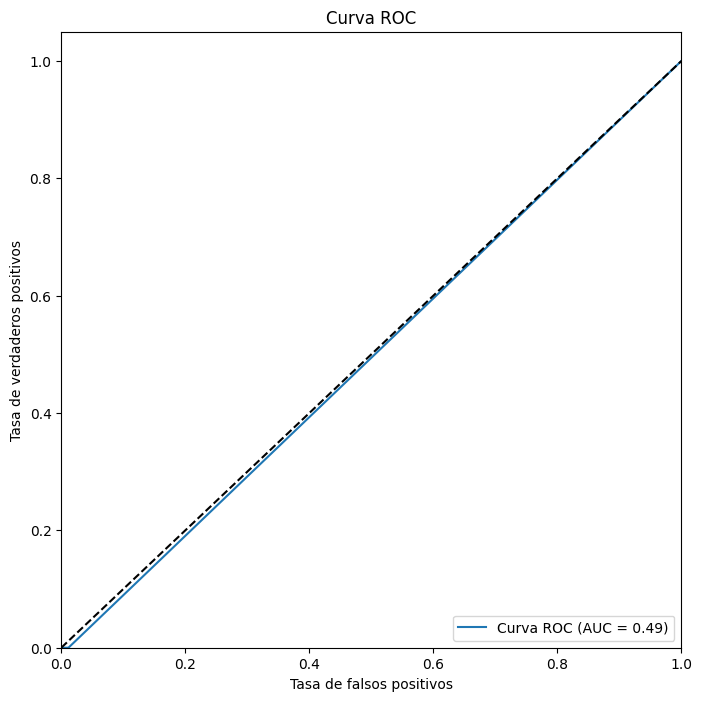

In [47]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal (sin información)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [48]:
#aplicamos umbral
import numpy as np


# Obtener las predicciones continuas del modelo
predicciones_continuas = model.predict(imagenes_test)

# Aplicar el umbral
umbral = 0.49
predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)

11/11 [==============================] - 0s 5ms/step


<ipython-input-48-3538f839cac7>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)


In [ ]:
print(len(predicciones_binarias))
print(len(y_true))

357
357


In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np



# calcular la matriz de confusión
cm = confusion_matrix(etiquetas_test, predicciones_binarias)
print(cm)

[[  0 173]
 [  0 173]]


# Modelo denso con data augmentation

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(180, 180, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Regularización L2
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación en grados
    width_shift_range=0.2,  # Rango de desplazamiento horizontal
    height_shift_range=0.2,  # Rango de desplazamiento vertical
    shear_range=0.2,  # Rango de deformación
    zoom_range=0.2,  # Rango de zoom
    horizontal_flip=True,  # Voltear horizontalmente las imágenes
    vertical_flip=False  # No voltear verticalmente las imágenes
)

# Ajustar el generador de data augmentation a tus datos de entrenamiento
datagen.fit(imagenes_train)

In [60]:
# Entrenar el modelo utilizando el generador de data augmentation
history = model.fit(
    datagen.flow(imagenes_train, etiquetas_train),
    epochs=20,
    validation_data=(imagenes_val, etiquetas_val)
)

Epoch 1/20
51/51 [==============================] - 11s 191ms/step - loss: 8.4377 - accuracy: 0.4994 - val_loss: 1.6215 - val_accuracy: 0.5000
Epoch 2/20
51/51 [==============================] - 10s 189ms/step - loss: 1.5213 - accuracy: 0.5049 - val_loss: 1.2443 - val_accuracy: 0.5086
Epoch 3/20
51/51 [==============================] - 10s 190ms/step - loss: 1.0741 - accuracy: 0.5006 - val_loss: 0.8938 - val_accuracy: 0.5086
Epoch 4/20
51/51 [==============================] - 10s 187ms/step - loss: 0.8046 - accuracy: 0.5000 - val_loss: 0.7293 - val_accuracy: 0.5029
Epoch 5/20
51/51 [==============================] - 11s 207ms/step - loss: 0.7094 - accuracy: 0.4969 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 6/20
51/51 [==============================] - 10s 190ms/step - loss: 0.6956 - accuracy: 0.5018 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 7/20
51/51 [==============================] - 10s 190ms/step - loss: 0.6935 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.5029

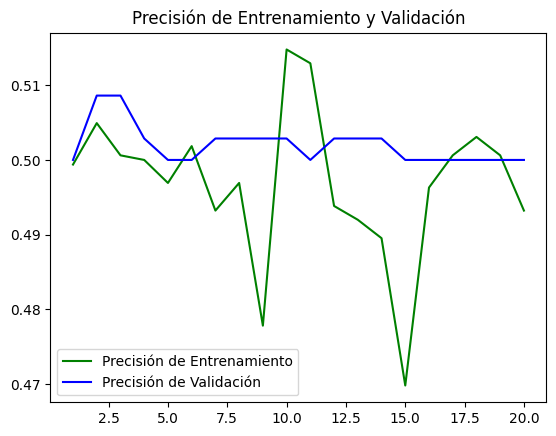

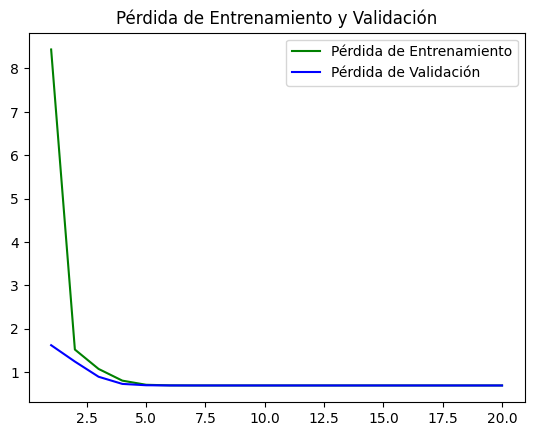

In [61]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(imagenes_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = etiquetas_test

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[173   0]
 [173   0]]


<ipython-input-63-d829bc8a1c09>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(imagenes_test)


In [64]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

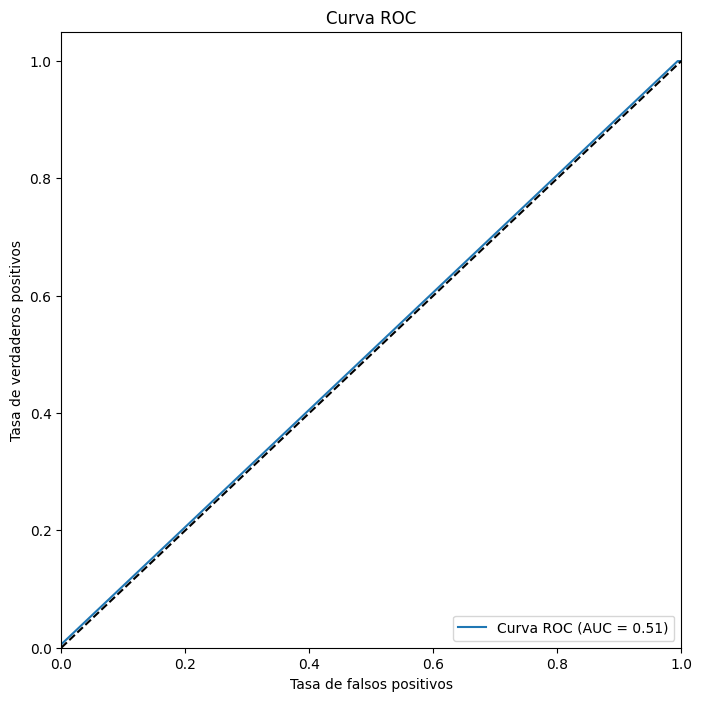

In [65]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal (sin información)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Intento aumentar clase 1

In [62]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear listas para almacenar las imágenes y etiquetas de cada clase
imagenes_clase0 = []
etiquetas_clase0 = []
imagenes_clase1 = []
etiquetas_clase1 = []

# Obtener los datos del generador en bucle y separar por clases
for i in range(len(generador)):
    batch_imagenes, batch_etiquetas = generador[i]
    imagenes_clase0.append(batch_imagenes[batch_etiquetas == 0])
    etiquetas_clase0.append(batch_etiquetas[batch_etiquetas == 0])
    imagenes_clase1.append(batch_imagenes[batch_etiquetas == 1])
    etiquetas_clase1.append(batch_etiquetas[batch_etiquetas == 1])

# Concatenar las listas y convertirlas en arrays numpy
imagenes_clase0 = np.concatenate(imagenes_clase0, axis=0)
etiquetas_clase0 = np.concatenate(etiquetas_clase0, axis=0)
imagenes_clase1 = np.concatenate(imagenes_clase1, axis=0)
etiquetas_clase1 = np.concatenate(etiquetas_clase1, axis=0)

# Asegurarse de que las etiquetas sean de tipo entero
etiquetas_clase0 = etiquetas_clase0.astype(int)
etiquetas_clase1 = etiquetas_clase1.astype(int)

# Verificar las dimensiones de los datos
print(imagenes_clase0.shape)
print(etiquetas_clase0.shape)
print(imagenes_clase1.shape)
print(etiquetas_clase1.shape)


(811, 180, 180, 3)
(811,)
(811, 180, 180, 3)
(811,)


In [66]:
# Crear un generador de data augmentation para la clase 1
datagen_clase1 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
datagen_clase0 = ImageDataGenerator()

# Ajustar el generador de data augmentation a las imágenes de la clase 1
datagen_clase1.fit(imagenes_clase1)


In [68]:
# Entrenar el modelo utilizando los generadores de data augmentation
history = model.fit(
    x=datagen_clase0.flow(imagenes_clase0, etiquetas_clase0, batch_size=64),
    #steps_per_epoch=len(imagenes_clase0) // 32,
    epochs=20,
    validation_data=datagen_clase1.flow(imagenes_clase1, etiquetas_clase1, batch_size=64)
    #validation_steps=len(imagenes_clase1) // 32
)

Epoch 1/20
13/13 [==============================] - 5s 434ms/step - loss: 0.6103 - accuracy: 1.0000 - val_loss: 0.7897 - val_accuracy: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 5s 418ms/step - loss: 0.6011 - accuracy: 1.0000 - val_loss: 0.8021 - val_accuracy: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 5s 425ms/step - loss: 0.5913 - accuracy: 1.0000 - val_loss: 0.8150 - val_accuracy: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 5s 411ms/step - loss: 0.5805 - accuracy: 1.0000 - val_loss: 0.8285 - val_accuracy: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 5s 419ms/step - loss: 0.5688 - accuracy: 1.0000 - val_loss: 0.8427 - val_accuracy: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 5s 410ms/step - loss: 0.5599 - accuracy: 1.0000 - val_loss: 0.8571 - val_accuracy: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 6s 454ms/step - loss: 0.5477 - accuracy: 1.0000 - val_loss: 0.8723 - val

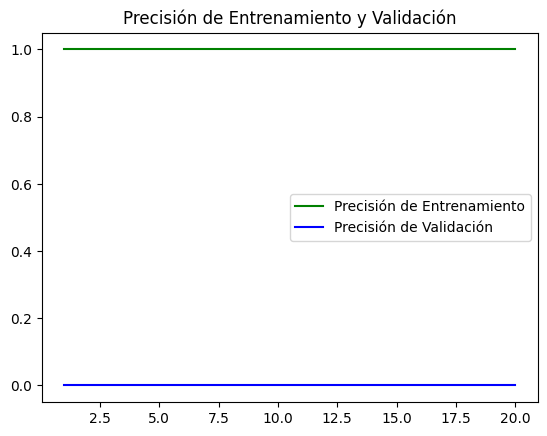

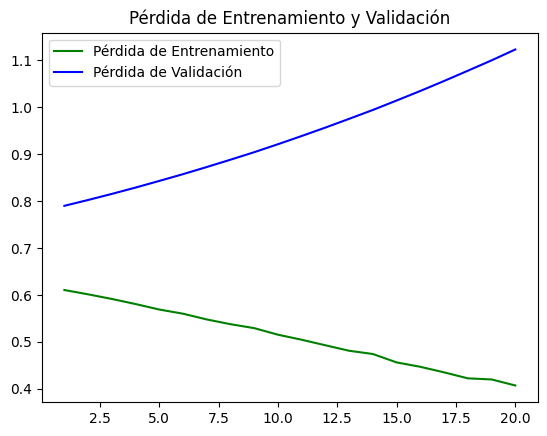

In [69]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

# MODELO BASICO CNN

In [87]:
from tensorflow import keras
from tensorflow.keras import layers

# El modelo espera imágenes RGB de tamaño 180 × 180
inputs = keras.Input(shape=(180, 180, 3))
# Reescala las entradas al rango [0, 1] dividiéndolas por 255
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [88]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 4)         148       
                                                                 
 flatten_1 (Flatten)         (None, 30276)             0         
                                                             

In [89]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [90]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Ruta específica donde guardar el fichero
        filepath="convnet_from_scratch.keras",
        # Las dos líneas siguientes, le dice al callback que solo guarde un 
        # nuevo archivo (sobrescribiendo cualquier anterior) cuando el valor 
        # actual de la métrica val_loss sea menor que en cualquier momento 
        # anterior durante el entrenamiento.
        save_best_only=True,
        monitor="val_loss")
]

In [91]:
history = model.fit(
    generador,
    epochs=20,
    batch_size= 32,
    validation_data=generador_val,
   callbacks=callbacks
   )

Epoch 1/20
51/51 [==============================] - 13s 144ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
51/51 [==============================] - 6s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
51/51 [==============================] - 6s 109ms/step - loss: 0.6932 - accuracy: 0.4852 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
51/51 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
51/51 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.4667 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
51/51 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
51/51 [==============================] - 6s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch

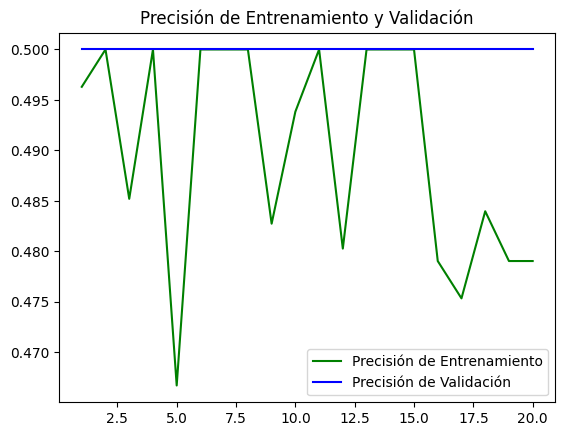

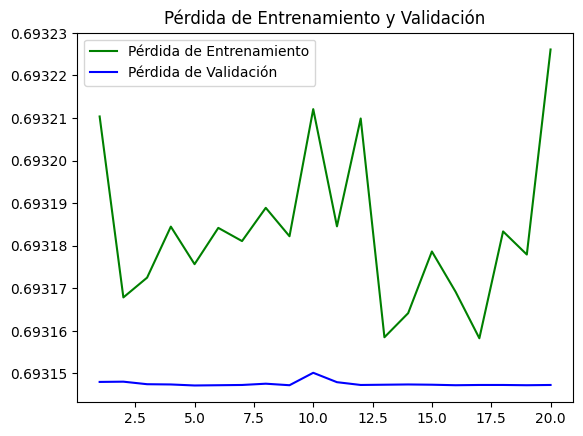

In [92]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(generador_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-93-0e3b5b805a63>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generador_test)


[[173   0]
 [173   0]]


**CURVA ROC**

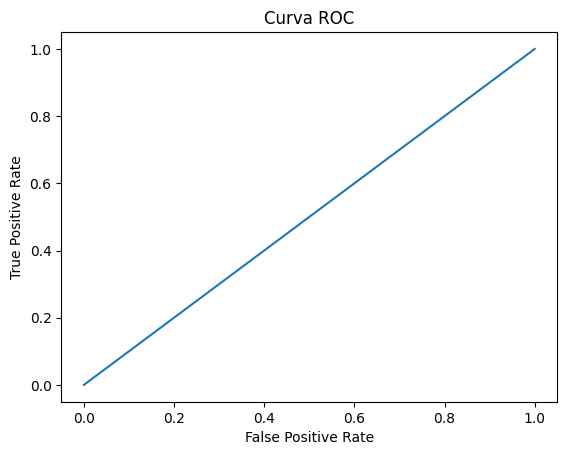

In [94]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Grafica la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


In [95]:
import numpy as np
from sklearn.metrics import precision_score



# Definir el rango de umbrales y el incremento
umbral_inicio = 0
umbral_fin = 1
incremento = 0.01

# Inicializar las listas para almacenar los umbrales y las precisiones
umbrales = []
precisiones = []

# Probar diferentes umbrales y calcular la precisión para cada uno
for umbral in np.arange(umbral_inicio, umbral_fin + incremento, incremento):
    y_pred_binario = (y_pred >= umbral).astype(int)
    precision = precision_score(y_true, y_pred_binario)
    
    umbrales.append(umbral)
    precisiones.append(precision)

# Imprimir los umbrales y las precisiones correspondientes
for umbral, precision in zip(umbrales, precisiones):
    print(f"Umbral: {umbral:.2f} - Precisión: {precision:.2f}")


Umbral: 0.00 - Precisión: 0.50
Umbral: 0.01 - Precisión: 0.50
Umbral: 0.02 - Precisión: 0.50
Umbral: 0.03 - Precisión: 0.50
Umbral: 0.04 - Precisión: 0.50
Umbral: 0.05 - Precisión: 0.50
Umbral: 0.06 - Precisión: 0.50
Umbral: 0.07 - Precisión: 0.50
Umbral: 0.08 - Precisión: 0.50
Umbral: 0.09 - Precisión: 0.50
Umbral: 0.10 - Precisión: 0.50
Umbral: 0.11 - Precisión: 0.50
Umbral: 0.12 - Precisión: 0.50
Umbral: 0.13 - Precisión: 0.50
Umbral: 0.14 - Precisión: 0.50
Umbral: 0.15 - Precisión: 0.50
Umbral: 0.16 - Precisión: 0.50
Umbral: 0.17 - Precisión: 0.50
Umbral: 0.18 - Precisión: 0.50
Umbral: 0.19 - Precisión: 0.50
Umbral: 0.20 - Precisión: 0.50
Umbral: 0.21 - Precisión: 0.50
Umbral: 0.22 - Precisión: 0.50
Umbral: 0.23 - Precisión: 0.50
Umbral: 0.24 - Precisión: 0.50
Umbral: 0.25 - Precisión: 0.50
Umbral: 0.26 - Precisión: 0.50
Umbral: 0.27 - Precisión: 0.50
Umbral: 0.28 - Precisión: 0.50
Umbral: 0.29 - Precisión: 0.50
Umbral: 0.30 - Precisión: 0.50
Umbral: 0.31 - Precisión: 0.50
Umbral: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
print(max(precisiones))
#Umbral: 0.48 - Precisión: 0.49

0.484593837535014


In [ ]:
#aplicamos umbral
import numpy as np


# Obtener las predicciones continuas del modelo
predicciones_continuas = model.predict(generador_test)

# Aplicar el umbral
umbral = 0.51
predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)

2/2 [==============================] - 1s 282ms/step


<ipython-input-101-e7c1884bab4a>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, predicciones_binarias)
print(cm)

[[153  20]
 [149  24]]


# SVM

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


KeyboardInterrupt: ignored

In [ ]:
import numpy as np



# Configurar los parámetros del generador
batch_size = 32  # Tamaño del lote (batch size)
total_samples = 38294  # Número total de muestras

# Generar las imágenes y etiquetas en lotes pequeños
for i in range(0, total_samples, batch_size):
    # Obtener el siguiente lote de imágenes y etiquetas
    batch_data = next(generador)
    batch_images = batch_data[0]
    batch_labels = batch_data[1]
    
    # Procesar las imágenes y etiquetas (ejemplo: guardarlas en el disco)
    for j in range(batch_size):
        image = batch_images[j]
        label = batch_labels[j]
        
        # Procesar la imagen y etiqueta aquí
        # Por ejemplo, guardarlas en el disco
        np.save(image)
        np.save(label)


IndexError: ignored

In [ ]:
# Crear un clasificador SVM
clf = svm.SVC()

# Entrenar el clasificador SVM
history= clf.fit(X_train, y_train)


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)


In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# PRIMER MODELO

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# El modelo espera imágenes RGB de tamaño 256 × 256
inputs = keras.Input(shape=(180, 180, 3))
# Reescala las entradas al rango [0, 1] dividiéndolas por 255
#x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(16)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 4)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 4)         148   

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Ruta específica donde guardar el fichero
        filepath="convnet_from_scratch.keras",
        # Las dos líneas siguientes, le dice al callback que solo guarde un 
        # nuevo archivo (sobrescribiendo cualquier anterior) cuando el valor 
        # actual de la métrica val_loss sea menor que en cualquier momento 
        # anterior durante el entrenamiento.
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    generador,
   # steps_per_epoch=50,
    epochs=30,
    validation_data=generador_val,
    callbacks=callbacks,
    #batch_size = 500
    )

Epoch 1/30
52/52 [==============================] - 19s 148ms/step - loss: 0.6941 - accuracy: 0.4893 - val_loss: 0.6921 - val_accuracy: 0.5382
Epoch 2/30
52/52 [==============================] - 6s 116ms/step - loss: 0.6922 - accuracy: 0.5338 - val_loss: 0.6870 - val_accuracy: 0.5794
Epoch 3/30
52/52 [==============================] - 6s 116ms/step - loss: 0.6861 - accuracy: 0.5631 - val_loss: 0.6799 - val_accuracy: 0.6088
Epoch 4/30
52/52 [==============================] - 6s 115ms/step - loss: 0.6629 - accuracy: 0.5966 - val_loss: 0.6407 - val_accuracy: 0.6382
Epoch 5/30
52/52 [==============================] - 6s 118ms/step - loss: 0.6330 - accuracy: 0.6319 - val_loss: 0.6152 - val_accuracy: 0.6441
Epoch 6/30
52/52 [==============================] - 6s 116ms/step - loss: 0.6007 - accuracy: 0.6740 - val_loss: 0.5952 - val_accuracy: 0.7059
Epoch 7/30
52/52 [==============================] - 6s 118ms/step - loss: 0.5418 - accuracy: 0.7270 - val_loss: 0.5560 - val_accuracy: 0.7206
Epoch

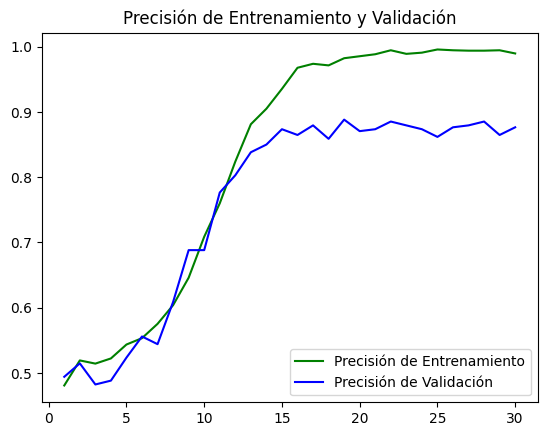

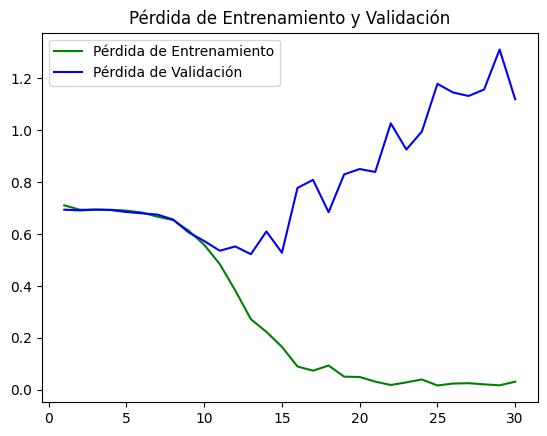

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

A partir de la 10 se dispara la perdida

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(generador_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-103-0e3b5b805a63>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generador_test)


[[184   0]
 [173   0]]


In [ ]:
print(max(y_pred))
print(min(y_pred))
print(np.mean(y_pred))

[1.]
[9.714001e-28]
0.47541857


In [ ]:
#aplicamos umbral
import numpy as np


# Obtener las predicciones continuas del modelo
predicciones_continuas = model.predict(generador_test)

# Aplicar el umbral
umbral = 0.5
predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)

# Imprimir las predicciones binarias
#predicciones_binarias


12/12 [==============================] - 1s 100ms/step


<ipython-input-110-57d27a9768cd>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, predicciones_binarias)
print(cm)

[[99 85]
 [90 83]]


# **ResNet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras import applications
import tensorflow as tf
from keras.models import Model

In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
conv_base = keras.applications.resnet.ResNet50(
    # Pasamos tres argumentos al constructor: 
    # weights especifica de donde se obtienen 
    # los pesos (el modelo preentrenado)  
    weights="imagenet",
    # include_top se refiere a incluir (o no) el clasificador 
    # densamente conectado en la parte superior de la red 
    # (el que clasifica en las 1000 clases de ImageNet). 
    # Usaremos nuestro propio clasificador Dense (con solo 
    # dos clases: gato y perro), no necesitamos incluir el 
    # de Imagenet, por eso ponemos False. 
    include_top=False,
    # input_shape es la forma de los tensores de imagen que 
    # enviaremos a la red. Este argumento es opcional: si no 
    # lo pasamos, la red podrá procesar entradas de cualquier 
    # tamaño. Lo para visualizar el tamaño de los mapas de 
    # características en el resumen.
    input_shape=(180, 180, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(generador)
val_features, val_labels =  get_features_and_labels(generador_val)
test_features, test_labels =  get_features_and_labels(generador_test)

1/1 [==============================] - 3s 3s/step


# Penalización para compensar

In [ ]:
etiquetas = generador.labels

In [ ]:
import numpy as np
np.unique(etiquetas)

array([0, 1])

In [ ]:
from sklearn.utils import compute_class_weight
# y_train is a list of class labels
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(etiquetas), y=etiquetas)


In [ ]:
print(class_weights)

[ 0.51081824 23.60912454]


In [ ]:
class_weight = {}
for i, valor in enumerate(class_weights):
    class_weight[i] = valor

In [ ]:
history = model.fit(generador, 
          steps_per_epoch=50, 
          epochs=30,
          validation_data=generador_val, 
          class_weight=class_weight)

Epoch 1/30
50/50 [==============================] - 68s 1s/step - loss: 0.8246 - accuracy: 0.9573 - val_loss: 0.6674 - val_accuracy: 0.9788
Epoch 2/30
50/50 [==============================] - 61s 1s/step - loss: 0.6743 - accuracy: 0.9787 - val_loss: 0.6810 - val_accuracy: 0.9788
Epoch 3/30
50/50 [==============================] - 59s 1s/step - loss: 0.7002 - accuracy: 0.9783 - val_loss: 0.6810 - val_accuracy: 0.9788
Epoch 4/30
50/50 [==============================] - 59s 1s/step - loss: 0.7233 - accuracy: 0.7069 - val_loss: 0.7072 - val_accuracy: 0.0212
Epoch 5/30
50/50 [==============================] - 59s 1s/step - loss: 0.6834 - accuracy: 0.0589 - val_loss: 0.6960 - val_accuracy: 0.0214
Epoch 6/30
50/50 [==============================] - 59s 1s/step - loss: 0.6892 - accuracy: 0.7630 - val_loss: 0.6889 - val_accuracy: 0.9787
Epoch 7/30
50/50 [==============================] - 63s 1s/step - loss: 0.7120 - accuracy: 0.3681 - val_loss: 0.7043 - val_accuracy: 0.0212
Epoch 8/30
50/50 [==

**Visualización curvas pérdida y precisión**

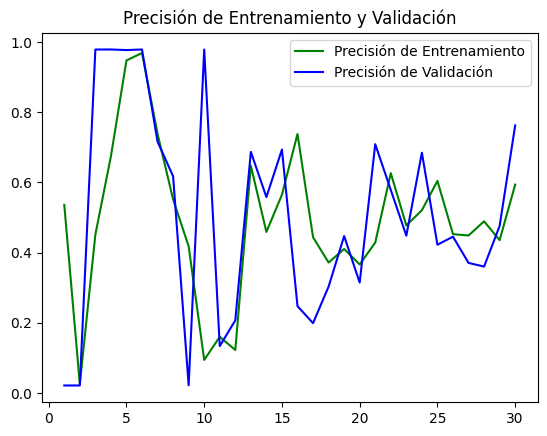

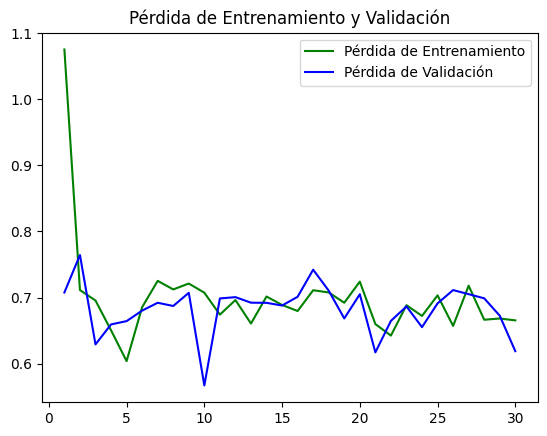

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(generador_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-34-0e3b5b805a63>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generador_test)


[[8032    0]
 [ 173    0]]


In [ ]:
np.unique(y_true)

array([0, 1])

In [ ]:
print(max(y_pred))
print(min(y_pred))
print(np.mean(y_pred))

[0.55152625]
[0.3958616]
0.5059228


In [ ]:
threshold = 0.47  # Umbral de clasificación

y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]

In [ ]:
from sklearn.metrics import f1_score, recall_score

f1 = f1_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
print(f1)
print(recall)

0.041427203065134095
1.0


# Data Augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from google.colab import files
from tensorflow.keras.preprocessing import image


In [ ]:
data_augmentation = keras.Sequential(
    [
        # Aplica volteo horizontal a un 50 % aleatorio 
        # de las imágenes que lo atraviesan
        layers.RandomFlip("horizontal"),
        # Rota las imágenes de entrada en un valor aleatorio en el
        # rango [–10%, +10%] (estas son fracciones de un círculo completo;
        # en grados, el rango sería [–36 grados, +36 grados])
        layers.RandomRotation(0.1),
        # Acerca o aleja la imagen por un factor 
        # aleatorio en el rango [-20%, +20%]
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    generador,
    epochs=30,
    validation_data=generador_val,
    callbacks=callbacks)

Epoch 1/30
52/52 [==============================] - 53s 802ms/step - loss: 0.6942 - accuracy: 0.5174 - val_loss: 0.6478 - val_accuracy: 0.9788
Epoch 2/30
52/52 [==============================] - 29s 562ms/step - loss: 0.6940 - accuracy: 0.4973 - val_loss: 0.6830 - val_accuracy: 0.9788
Epoch 3/30
52/52 [==============================] - 29s 566ms/step - loss: 0.6938 - accuracy: 0.4985 - val_loss: 0.6721 - val_accuracy: 0.9788
Epoch 4/30
52/52 [==============================] - 29s 561ms/step - loss: 0.6936 - accuracy: 0.4899 - val_loss: 0.6916 - val_accuracy: 0.9788
Epoch 5/30
52/52 [==============================] - 29s 564ms/step - loss: 0.6938 - accuracy: 0.4942 - val_loss: 0.6862 - val_accuracy: 0.9788
Epoch 6/30
44/52 [========================>.....] - ETA: 0s - loss: 0.6934 - accuracy: 0.4982

KeyboardInterrupt: ignored

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(generador_test)
print(f"Precisión de Test: {test_acc:.3f}")

12/12 [==============================] - 1s 102ms/step - loss: 0.6937 - accuracy: 0.4846
Precisión de Test: 0.485


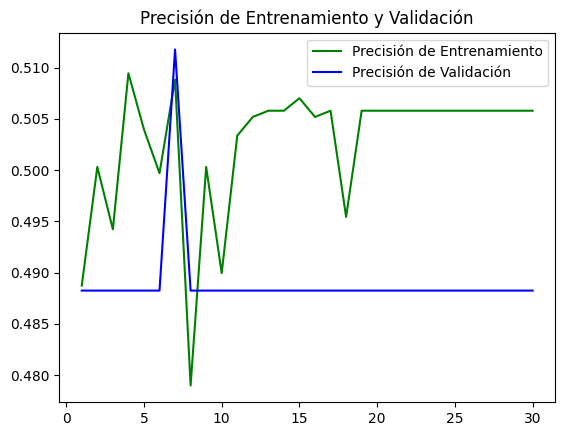

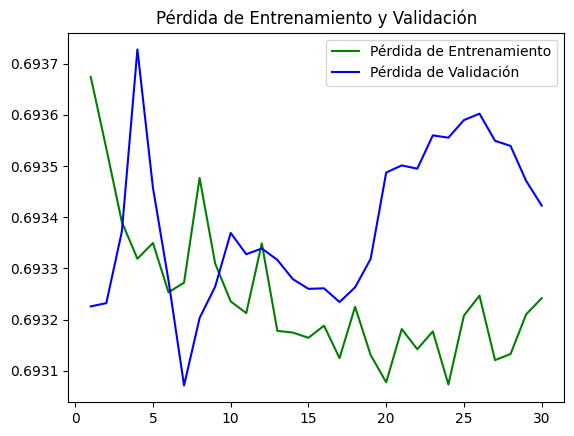

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

In [ ]:
print(max(y_pred))
print(min(y_pred))
print(np.mean(y_pred))

[0.49476126]
[0.49476126]
0.49476132


In [ ]:
import numpy as np


# Obtener las predicciones continuas del modelo
predicciones_continuas = model.predict(generador_test)

# Aplicar el umbral
umbral = 0.49476132
predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)

12/12 [==============================] - 1s 98ms/step


<ipython-input-131-c6644c995144>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicciones_binarias = (predicciones_continuas >= umbral).astype(np.int)


In [ ]:
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, predicciones_binarias)
print(cm)

[[184   0]
 [173   0]]


# VGG-16

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras import applications
import tensorflow as tf
from keras.models import Model

In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    # Pasamos tres argumentos al constructor: 
    # weights especifica de donde se obtienen 
    # los pesos (el modelo preentrenado)  
    weights="imagenet",
    # include_top se refiere a incluir (o no) el clasificador 
    # densamente conectado en la parte superior de la red 
    # (el que clasifica en las 1000 clases de ImageNet). 
    # Usaremos nuestro propio clasificador Dense (con solo 
    # dos clases: gato y perro), no necesitamos incluir el 
    # de Imagenet, por eso ponemos False. 
    include_top=False,
    # input_shape es la forma de los tensores de imagen que 
    # enviaremos a la red. Este argumento es opcional: si no 
    # lo pasamos, la red podrá procesar entradas de cualquier 
    # tamaño. Lo para visualizar el tamaño de los mapas de 
    # características en el resumen.
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(generador)
val_features, val_labels =  get_features_and_labels(generador_val)
test_features, test_labels =  get_features_and_labels(generador_test)

1/1 [==============================] - 72s 72s/step


In [ ]:
train_features.shape

## cambio de métrica

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.MeanSquaredError()])

In [ ]:
model.fit(generador, 
          steps_per_epoch=50, 
          epochs=30,
          validation_data=generador_val, 
          class_weight=class_weight)

Epoch 1/30
50/50 [==============================] - 77s 1s/step - loss: 0.6798 - binary_accuracy: 0.6916 - precision_1: 0.0374 - recall_1: 0.5328 - mean_squared_error: 0.1861 - val_loss: 0.6806 - val_binary_accuracy: 0.4226 - val_precision_1: 0.0242 - val_recall_1: 0.6667 - val_mean_squared_error: 0.2442
Epoch 2/30
50/50 [==============================] - 71s 1s/step - loss: 0.6463 - binary_accuracy: 0.5619 - precision_1: 0.0248 - recall_1: 0.5691 - mean_squared_error: 0.2202 - val_loss: 0.6474 - val_binary_accuracy: 0.4653 - val_precision_1: 0.0246 - val_recall_1: 0.6264 - val_mean_squared_error: 0.2294
Epoch 3/30
50/50 [==============================] - 66s 1s/step - loss: 0.6744 - binary_accuracy: 0.4498 - precision_1: 0.0228 - recall_1: 0.6429 - mean_squared_error: 0.2275 - val_loss: 0.6807 - val_binary_accuracy: 0.3637 - val_precision_1: 0.0243 - val_recall_1: 0.7414 - val_mean_squared_error: 0.2450
Epoch 4/30
50/50 [==============================] - 67s 1s/step - loss: 0.6240 - b

In [ ]:
f1 = f1_score(y_true, np.round(y_pred))

In [ ]:
f1

0.04180522565320665

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', tf.keras.metrics.Recall()])


In [ ]:
model.fit(generador, 
          steps_per_epoch=50, 
          epochs=30,
          validation_data=generador_val, 
          class_weight=class_weight)

Epoch 1/30
50/50 [==============================] - 72s 1s/step - loss: 0.5037 - binary_accuracy: 0.7768 - recall_3: 0.7077 - val_loss: 0.4681 - val_binary_accuracy: 0.7107 - val_recall_3: 0.6667
Epoch 2/30
50/50 [==============================] - 65s 1s/step - loss: 0.5214 - binary_accuracy: 0.6877 - recall_3: 0.7185 - val_loss: 0.4230 - val_binary_accuracy: 0.7662 - val_recall_3: 0.5920
Epoch 3/30
50/50 [==============================] - 67s 1s/step - loss: 0.5661 - binary_accuracy: 0.6770 - recall_3: 0.7451 - val_loss: 0.5732 - val_binary_accuracy: 0.5890 - val_recall_3: 0.7241
Epoch 4/30
50/50 [==============================] - 66s 1s/step - loss: 0.5472 - binary_accuracy: 0.6834 - recall_3: 0.7708 - val_loss: 0.5863 - val_binary_accuracy: 0.5903 - val_recall_3: 0.7414
Epoch 5/30
50/50 [==============================] - 74s 1s/step - loss: 0.5540 - binary_accuracy: 0.6472 - recall_3: 0.7985 - val_loss: 0.5275 - val_binary_accuracy: 0.6587 - val_recall_3: 0.7414
Epoch 6/30
50/50 [==

In [ ]:
import matplotlib.pyplot as plt



# Obtener los valores de BinaryAccuracy y Recall en cada época
binary_accuracy = history.history['binary_accuracy']
recall = history.history['recall']

# Crear una lista con los números de época
epochs = range(1, len(binary_accuracy) + 1)

# Graficar BinaryAccuracy y Recall
plt.plot(epochs, binary_accuracy, 'b', label='Binary Accuracy')
plt.plot(epochs, recall, 'r', label='Recall')
plt.title('Binary Accuracy and Recall')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt
binary_acurracy = history.history["BinaryAccuracy"]
val_binary_acurracy = history.history["val_BinaryAccuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Precisión de Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión de Validación")
plt.title("Precisión de Entrenamiento y Validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Pérdida de Entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida de Validación")
plt.title("Pérdida de Entrenamiento y Validación")
plt.legend()
plt.show()

KeyError: ignored

In [ ]:
# generar predicciones en el conjunto de prueba
y_pred = model.predict_generator(generador_test)

# convertir las predicciones en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# obtener las etiquetas reales
y_true = generador_test.classes

# calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

<ipython-input-69-7cf61a2e5b97>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generador_test)


[[8032    0]
 [ 173    0]]


**Cambio de métrica**

In [ ]:
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)

model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['F1-Score'])
model.summary()

# MULTIMODAL

In [ ]:
# Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                      object
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
image_zip                   object
dtype: object

In [ ]:
null_counts = df.isnull().sum()
null_counts

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
image_zip                      0
dtype: int64

In [ ]:
media_col1 = df['age'].mean()

# Llenar los valores nulos de 'col1' con la media
df['age'].fillna(media_col1, inplace=True)
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,9973_1729524723.png
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,9989_63473691.png
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,9989_1078943060.png
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,9989_398038886.png


In [ ]:
df['age'] = df['age'].astype(int)
df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                          int64
cancer                      object
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
image_zip                   object
dtype: object

In [ ]:
# Definir el DataFrame con las variables adicionales
df_variables = df.drop(['cancer', 'BIRADS', 'density'], axis=1)
df_variables.head(3)

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,implant,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61,0,0,0,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61,0,0,0,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61,0,0,0,29,False,10006_1864590858.png


In [ ]:
df_variables['difficult_negative_case'] = df_variables['difficult_negative_case'].astype(int)
#False se convierte en 0, True en 1

In [ ]:
# Definir el DataFrame con las variables adicionales
df_variables = df.drop(['cancer', 'BIRADS', 'density'], axis=1)
df_variables.head(3)

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,implant,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61,0,0,0,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61,0,0,0,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61,0,0,0,29,False,10006_1864590858.png


In [ ]:
len(df_variables)

54706

In [ ]:
nombres_imagenes = generador.filenames

# Seleccionar los registros del DataFrame cuyos nombres de imagen coinciden con los nombres del generador
registros_seleccionados_train = df[df['image_zip'].isin(nombres_imagenes)]

In [ ]:
nombres_imagenes = generador_val.filenames

# Seleccionar los registros del DataFrame cuyos nombres de imagen coinciden con los nombres del generador
registros_seleccionados_val = df[df['image_zip'].isin(nombres_imagenes)]

In [ ]:
nombres_imagenes = generador_test.filenames

# Seleccionar los registros del DataFrame cuyos nombres de imagen coinciden con los nombres del generador
registros_seleccionados_test = df[df['image_zip'].isin(nombres_imagenes)]

**entrenamiento**

In [ ]:
len(registros_seleccionados_train)

38294

**val**

In [ ]:
len(registros_seleccionados_val)

8207

**test**

In [ ]:
len(registros_seleccionados_test)

8205

Se convierte a array

In [ ]:
import numpy as np

# Generar un lote de imágenes y etiquetas
batch_images, batch_labels = generador.next()

# Convertir las imágenes a matrices
image_matrices = np.array(batch_images)

In [ ]:
image_matrices[1]

In [ ]:
# Generar un lote de imágenes y etiquetas
batch_images, batch_labels = generador_val.next()

# Convertir las imágenes a matrices
image_matrices_val = np.array(batch_images)

In [ ]:
df_variables.dtypes

site_id                     int64
patient_id                  int64
image_id                    int64
laterality                 object
view                       object
age                         int64
biopsy                      int64
invasive                    int64
implant                     int64
machine_id                  int64
difficult_negative_case     int64
image_zip                  object
dtype: object

In [ ]:
# Definir el modelo
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
flatten_layer = Flatten()(base_model.output)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Dividir el dataframe en características numéricas categóricas y de texto y las imágenes
datos = df_variables.drop(['image_zip'], axis=1)

images = df_variables['image_zip']

In [ ]:
datos.shape[1]

11

In [ ]:
num_cat_input = tf.keras.Input(shape=(datos.shape[1],))

img_input = tf.keras.Input(shape=(180, 180, 3))

In [ ]:
# Capas para características numéricas categóricas
num_cat_layers = Dense(64, activation='relu')(num_cat_input)


# Capas para características de imágenes
img_layers = Flatten()(img_input)

# Combinar todas las capas de características
combined_layers = Concatenate()([num_cat_layers, img_layers])

# Capas finales para la clasificación
output_layer = Dense(1, activation='sigmoid')(combined_layers)

# Crear el modelo final
model = Model(inputs=[num_cat_input, img_input], outputs=output_layer)

In [ ]:
# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit([registros_seleccionados_train, registros_seleccionados_val, image_matrices], [registros_seleccionados_train['cancer'],registros_seleccionados_val['cancer'],image_matrices_val], batch_size=32, epochs=10)

ValueError: ignored

In [ ]:
2+1

3

# INTENTO 2 MULTIMODAL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
media_col1 = df['age'].mean()

# Llenar los valores nulos de 'col1' con la media
df['age'].fillna(media_col1, inplace=True)
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61,0,0,0,NaN,0,NaN,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61,0,0,0,NaN,0,NaN,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61,0,0,0,NaN,0,NaN,29,False,10006_1864590858.png
3,2,10006,1874946579,R,CC,61,0,0,0,NaN,0,NaN,29,False,10006_1874946579.png
4,2,10011,220375232,L,CC,55,0,0,0,0.0,0,NaN,21,True,10011_220375232.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43,0,0,0,1.0,0,C,49,False,9973_1729524723.png
54702,1,9989,63473691,L,MLO,60,0,0,0,NaN,0,C,216,False,9989_63473691.png
54703,1,9989,1078943060,L,CC,60,0,0,0,NaN,0,C,216,False,9989_1078943060.png
54704,1,9989,398038886,R,MLO,60,0,0,0,0.0,0,C,216,True,9989_398038886.png


In [ ]:
df['age'] = df['age'].astype(int)
df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                          int64
cancer                      object
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
image_zip                   object
dtype: object

In [ ]:
# Definir el DataFrame con las variables adicionales
df_variables = df.drop(['cancer', 'BIRADS', 'density'], axis=1)
df_variables.head(3)

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,implant,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61,0,0,0,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61,0,0,0,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61,0,0,0,29,False,10006_1864590858.png


In [ ]:
df_variables['difficult_negative_case'] = df_variables['difficult_negative_case'].astype(int)
#False se convierte en 0, True en 1

In [ ]:
# Definir el DataFrame con las variables adicionales
df_variables = df.drop([ 'BIRADS', 'density'], axis=1)
df_variables.head(3)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,implant,machine_id,difficult_negative_case,image_zip
0,2,10006,462822612,L,CC,61,0,0,0,0,29,False,10006_462822612.png
1,2,10006,1459541791,L,MLO,61,0,0,0,0,29,False,10006_1459541791.png
2,2,10006,1864590858,R,MLO,61,0,0,0,0,29,False,10006_1864590858.png


In [ ]:
len(df_variables)

54706

**Data entrenamiento**

In [ ]:
nombres_imagenes = generador.filenames

# Seleccionar los registros del DataFrame cuyos nombres de imagen coinciden con los nombres del generador
registros_seleccionados_train = df_variables[df_variables['image_zip'].isin(nombres_imagenes)]

In [ ]:
len(registros_seleccionados_train)

38294

**Data validation**

In [ ]:
nombres_imagenes = generador_val.filenames

# Seleccionar los registros del DataFrame cuyos nombres de imagen coinciden con los nombres del generador
registros_seleccionados_val = df_variables[df_variables['image_zip'].isin(nombres_imagenes)]

In [ ]:
len(registros_seleccionados_val)

8207

**Data test**

In [ ]:
nombres_imagenes = generador_test.filenames

# Seleccionar los registros del DataFrame cuyos nombres de imagen coinciden con los nombres del generador
registros_seleccionados_test = df_variables[df_variables['image_zip'].isin(nombres_imagenes)]

In [ ]:
len(registros_seleccionados_test)

8205

In [ ]:
# Define generadores para las variables numéricas y categóricas
def data_generator(dataframe, image_generator, batch_size):
    while True:
        for i in range(0, len(dataframe), batch_size):
            batch_data = dataframe.iloc[i:i+batch_size]
            image_paths = batch_data['image_path'].tolist()
            numeric_features = batch_data[['numeric_feature1', 'numeric_feature2']].values
            categorical_features = batch_data['categorical_feature'].values
            labels = batch_data['label'].values
            
            batch_images = next(image_generator)  # Generador de imágenes
            
            yield [batch_images, numeric_features, categorical_features], labels


In [ ]:
registros_seleccionados_train.dtypes

site_id                     int64
patient_id                  int64
image_id                    int64
laterality                 object
view                       object
age                         int64
cancer                     object
biopsy                      int64
invasive                    int64
implant                     int64
machine_id                  int64
difficult_negative_case      bool
image_zip                  object
dtype: object

In [ ]:
# Obtén los datos para las variables numéricas y categóricas
#entrenamiento
numeric_features_train = registros_seleccionados_train[['site_id','patient_id','image_id','age','biopsy','invasive','implant','machine_id','difficult_negative_case']].values
categorical_features_train = registros_seleccionados_train[['laterality','view','image_zip']].values
labels_train = registros_seleccionados_train['cancer'].values

#validacion
numeric_features_train = registros_seleccionados_val[['site_id','patient_id','image_id','age','biopsy','invasive','implant','machine_id','difficult_negative_case']].values
categorical_features_train = registros_seleccionados_val[['laterality','view','image_zip']].values
labels_train = registros_seleccionados_val['cancer'].values

#test
numeric_features_train = registros_seleccionados_test[['site_id','patient_id','image_id','age','biopsy','invasive','implant','machine_id','difficult_negative_case']].values
categorical_features_train = registros_seleccionados_test[['laterality','view','image_zip']].values
labels_train = registros_seleccionados_test['cancer'].values



In [ ]:
#  Creación del modelo
# Creamos una CNN para procesar las imágenes
image_input = layers.Input(shape=(180, 180, 3))
conv_layer1 = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)
# Agrega más capas convolucionales y de pooling si es necesario

# Creamos capas densas para procesar las variables numéricas y categóricas
numeric_input = layers.Input(shape=(9,))
numeric_dense = layers.Dense(64, activation='relu')(numeric_input)

categorical_input = layers.Input(shape=(3,))
categorical_embedding = layers.Embedding(3, 64)(categorical_input)
categorical_flatten = layers.Flatten()(categorical_embedding)

# Combina las características extraídas de las imágenes y las variables
combined_features = layers.concatenate([conv_layer1, numeric_dense, categorical_flatten])



ValueError: ignored

In [ ]:
# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Definir los tamaños de lote para los generadores
batch_size_train = len(train_data)
batch_size_val = len(val_data)
batch_size_test = len(test_data)

# Crea los generadores de datos utilizando los generadores de imágenes y los dataframes
train_data_generator = data_generator(train_data, train_image_generator, batch_size_train)
val_data_generator = data_generator(val_data, val_image_generator, batch_size_val)


In [ ]:
# Entrena el modelo utilizando los generadores de datos
model.fit_generator(train_data_generator, steps_per_epoch=1, epochs=10, validation_data=val_data_generator, validation_steps=1)


# Multimodal 3 

In [ ]:
import pandas as pd
from skimage.io import imread
from sklearn.model_selection import train_test_split



# Cargar imágenes desde el generador
def load_image(image_path):
    # Carga la imagen desde el generador
    image = imread(image_path)
    # Preprocesamiento adicional si es necesario
    return image

# Cargar imágenes y etiquetas
images = [load_image('/content/train/'+ image_path) for image_path in registros_seleccionados_train['image_zip']]
labels = registros_seleccionados_train['cancer']

images_val = [load_image('/content/val/'+ image_path) for image_path in registros_seleccionados_val['image_zip']]
labels_val = registros_seleccionados_val['cancer']

images_test = [load_image('/content/test/'+ image_path) for image_path in registros_seleccionados_test['image_zip']]
labels_test = registros_seleccionados_test['cancer']

In [ ]:
import pandas as pd
from skimage.io import imread
from sklearn.model_selection import train_test_split



# Cargar imágenes desde el generador
def load_image(image_path):
    # Carga la imagen desde el generador
    image = imread(image_path)
    # Preprocesamiento adicional si es necesario
    return image

In [ ]:
#sin bucles
# Cargar imágenes desde el generador

images = list(map(load_image, '/content/train/' + registros_seleccionados_train['image_zip']))
labels = registros_seleccionados_train['cancer']

images_val = list(map(load_image, '/content/val/' + registros_seleccionados_val['image_zip']))
labels_val = registros_seleccionados_val['cancer']

images_test = list(map(load_image, '/content/test/' + registros_seleccionados_test['image_zip']))
labels_test = registros_seleccionados_test['cancer']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate

# Construir la rama de imágenes utilizando VGG16 preentrenada
image_input = Input(shape=(180, 180, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=image_input)
image_features = base_model.output
image_features = Flatten()(image_features)

# Construir la rama de datos adicionales
additional_input = Input(shape=(12,))
additional_features = Dense(128, activation='relu')(additional_input)

# Combinar las salidas de las ramas
combined_features = Concatenate()([image_features, additional_features])
output = Dense(1, activation='sigmoid')(combined_features)

# Crear el modelo multimodal
model = Model(inputs=[image_input, additional_input], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 2s 0us/step


EJEMPLO PARA METER LOS DATOS DEL CSV

SE DEBE HACER CON TRAIN VAL Y TEST

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataset de datos adicionales
additional_data = pd.read_csv('additional_data.csv')

# Realizar preprocesamiento en los datos adicionales
# Por ejemplo, normalizar características numéricas
scaler = MinMaxScaler()
additional_data[numerical_columns] = scaler.fit_transform(additional_data[numerical_columns])


In [ ]:
# Entrenar el modelo
model.fit([images, train_additional_data], train_labels, validation_data=([val_images, val_additional_data], val_labels), epochs=10, batch_size=32)


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate([test_images, test_additional_data], test_labels)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')
